# Question 1

In [338]:
import numpy as np
import random
from sklearn.metrics import r2_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
from sklearn.model_selection import train_test_split

## Generate dataset

In [339]:
mean=np.array([10, 6, 4, 8, 4, 2, 9])
cov = np.array(make_spd_matrix(n_dim=7, random_state=0))

rng=np.random.default_rng()
X=np.array(rng.multivariate_normal(mean, cov, size=1000))

Y=np.array([])
for i in range(0, 1000):
    Y=np.append(Y, random.randint(0, 1000))


df=pd.DataFrame(data=X)
df=df.join(pd.DataFrame(data=Y, columns=['output']))
df

,0,1,2,3,4,5,6,output
0,9.802845,6.348197,3.508618,9.876327,2.659656,1.999198,7.380082,907.0
1,10.632692,5.886307,4.337288,8.813941,5.201065,2.174238,9.607560,122.0
2,14.492472,2.993025,7.909485,4.204169,6.737862,4.098366,11.465919,637.0
3,10.120015,6.736378,4.050319,7.655718,3.171652,1.555191,7.564411,985.0
4,8.361726,5.771730,2.450624,9.614799,3.894548,1.861906,8.793352,666.0
...,...,...,...,...,...,...,...,...
995,10.705461,6.612096,5.133828,7.231344,4.452106,2.283915,9.216298,511.0
996,9.590234,6.424184,3.936126,8.759821,4.530874,1.755257,8.118234,90.0
997,10.617312,5.018237,5.003116,8.135650,4.171666,0.724665,9.589477,805.0
998,11.170639,5.767074,4.899027,7.505189,4.344371,2.891363,9.624275,254.0


Text(0.5, 1.0, 'Pearson Correlation Heatmap')

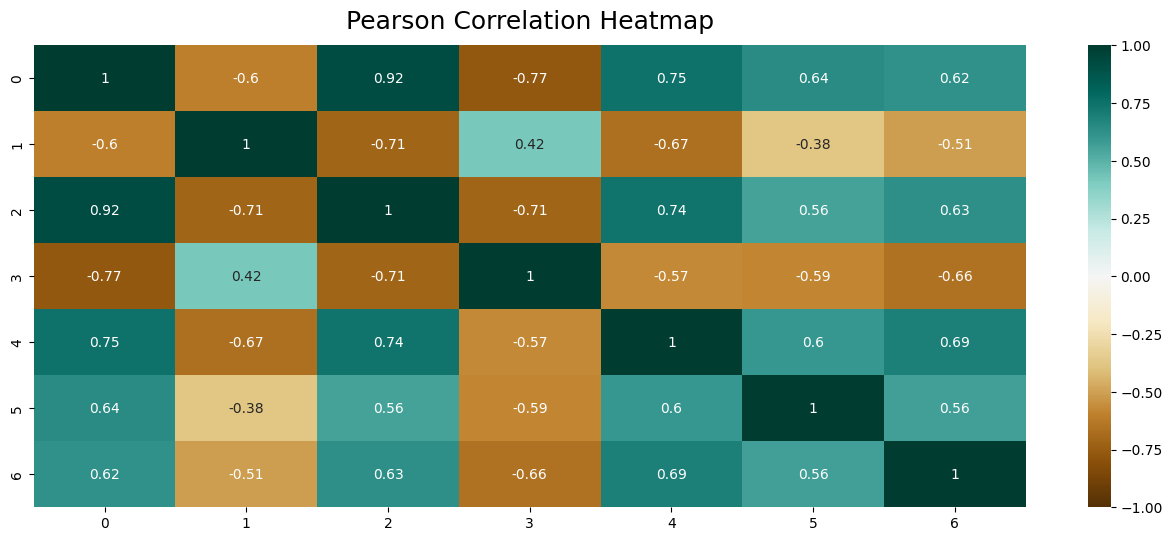

In [340]:
plt.figure(figsize=(16,6))
heatmap=sns.heatmap(df.iloc[:,0:7].corr(),vmin=-1,vmax=1,annot=True,cmap='BrBG')
heatmap.set_title('Pearson Correlation Heatmap',fontdict={'fontsize':18},pad=12)

## Ridge Regression using Gradient Descent

In [341]:
learning_rates=[0.0001, 0.001, 0.01, 0.1, 1, 10]
regularization_parameters=[1e-15, 1e-10, 1e-5, 1e-3, 0.1, 10, 20]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

#Prepend X_test with a column of 1s
no_of_rows, no_of_columns=X_test.shape
X_ones=np.ones((no_of_rows, 1))
X_test_with_ones=np.hstack((X_ones, X_test))

#Prepend X_train with a column of 1s
no_of_rows, no_of_columns=X_train.shape
X_ones=np.ones((no_of_rows, 1))
X_train_with_ones=np.hstack((X_ones, X_train))



no_of_iterations=10
alpha=1e-5
lamda=0

for alpha in learning_rates:
    for lamda in regularization_parameters:
        B=[0]*(no_of_columns+1)
        for iteration in range(0, no_of_iterations):
            
            new_B=[]
            for beta_index in range(0, len(B)):
                
                cost=0
                sum=0
                for row_index in range(0, no_of_rows):
                    
                    BX_sum=0
                    for i in range(0, len(B)):
                        BX_sum=BX_sum + B[i]*X_train_with_ones[row_index][i]                            
                    
                    cost=cost+ pow(Y_train[row_index]-BX_sum, 2) + lamda*np.sum(np.square(B))    
                    sum = sum + (BX_sum - Y_train[row_index]) * X_train_with_ones[row_index][beta_index]   
                
                cost=(1/(2*no_of_rows)) * cost
                new_B_val = B[beta_index]*(1-alpha*lamda/no_of_rows) - (alpha/no_of_rows)*sum
                new_B.append(new_B_val)

            B=new_B

        #Calculate Y_predicted
        Y_predicted=np.matmul(X_test_with_ones, B)
        print(f"alpha={alpha}\tlambda={lamda}\tCost={cost}\t\tR2 Score={r2_score(Y_test, Y_predicted)}")
    print("")


alpha=0.0001	lambda=1e-15	Cost=112297.09109411461		R2 Score=-1.6109699757947507
alpha=0.0001	lambda=1e-10	Cost=112297.09109411591		R2 Score=-1.6109699757947507
alpha=0.0001	lambda=1e-05	Cost=112297.09134805355		R2 Score=-1.6109699758024183
alpha=0.0001	lambda=0.001	Cost=112297.11648802148		R2 Score=-1.6109699765615475
alpha=0.0001	lambda=0.1	Cost=112299.6304843767		R2 Score=-1.6109700524744013
alpha=0.0001	lambda=10	Cost=112551.02731547032		R2 Score=-1.6109776437399748
alpha=0.0001	lambda=20	Cost=112804.9578706203		R2 Score=-1.6109853116450163

alpha=0.001	lambda=1e-15	Cost=42654.53848292293		R2 Score=-0.009895187644916481
alpha=0.001	lambda=1e-10	Cost=42654.53848295997		R2 Score=-0.009895187644916481
alpha=0.001	lambda=1e-05	Cost=42654.54215597208		R2 Score=-0.009895187651418391
alpha=0.001	lambda=0.001	Cost=42654.90578779078		R2 Score=-0.009895188295101054
alpha=0.001	lambda=0.1	Cost=42691.26894175986		R2 Score=-0.009895252663816523
alpha=0.001	lambda=10	Cost=46327.304728099196		R2 S

### The best parameters are alpha=0.001 and lambda=1e-15

# Question 2

In [342]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [343]:
df=pd.read_csv('Hitters.csv')
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


## (a) Data Preprocessing

### Null values

In [344]:
print(df.isna().sum())
df['Salary']=df['Salary'].fillna(df['Salary'].mean())
df

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,535.925882,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500000,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.000000,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.000000,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.000000,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.000000,A


### Noisy values/Outliers

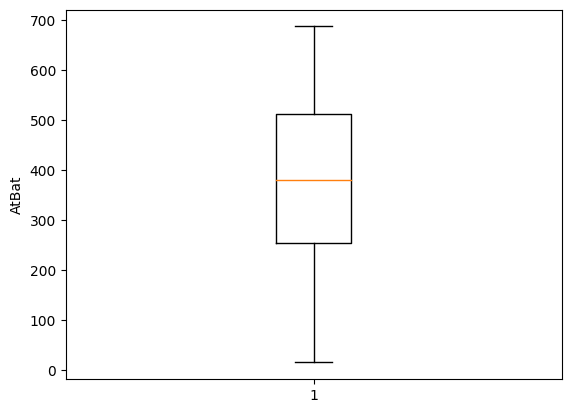

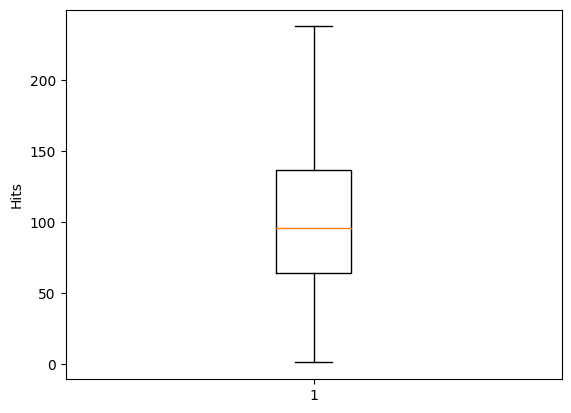

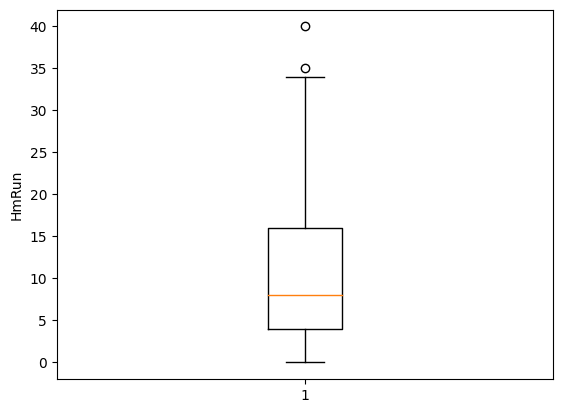

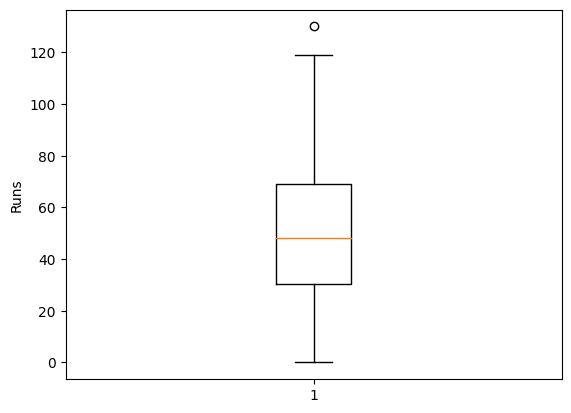

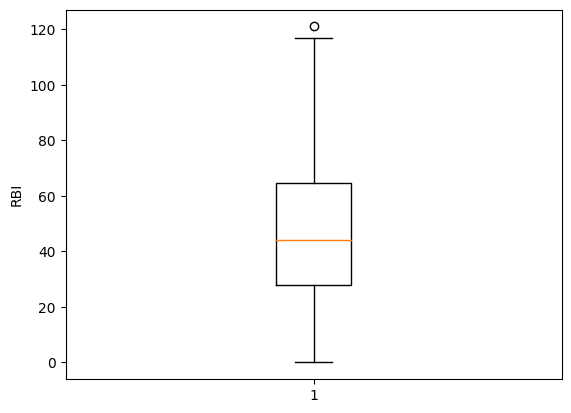

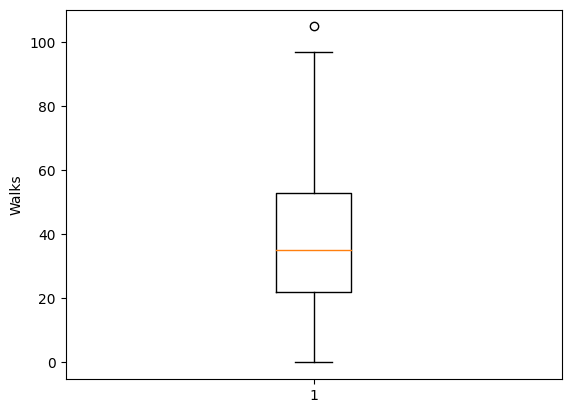

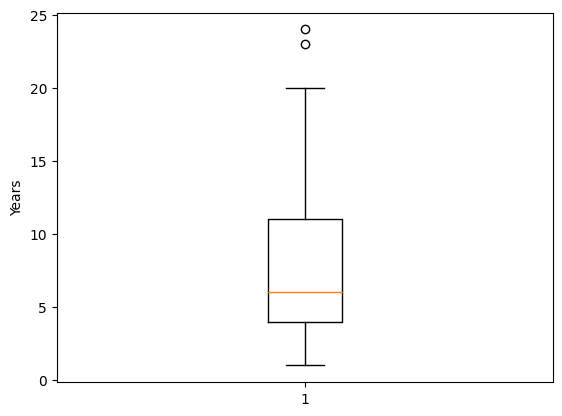

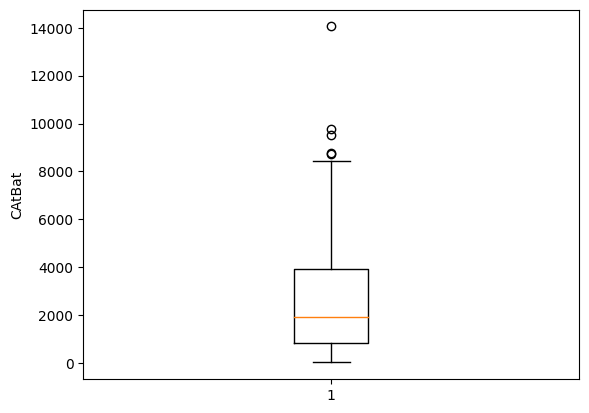

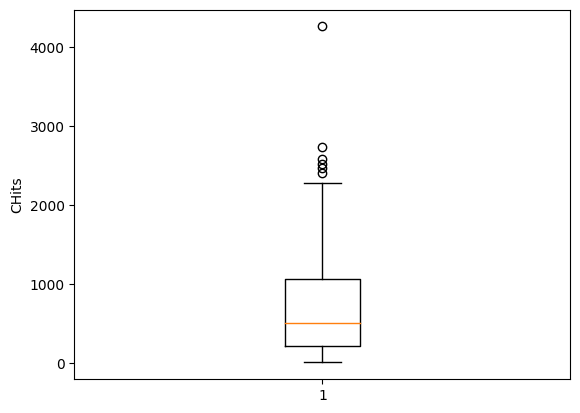

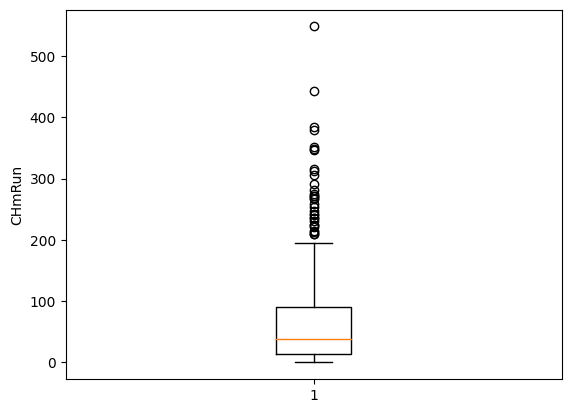

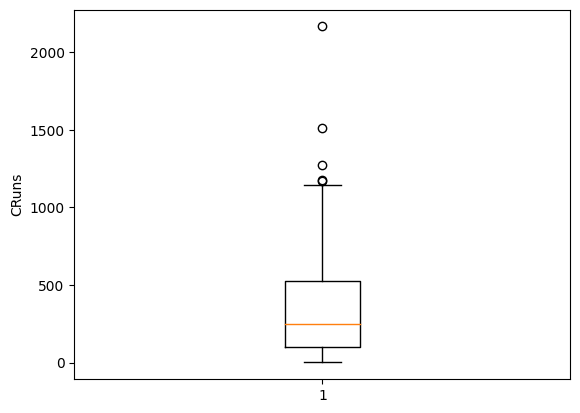

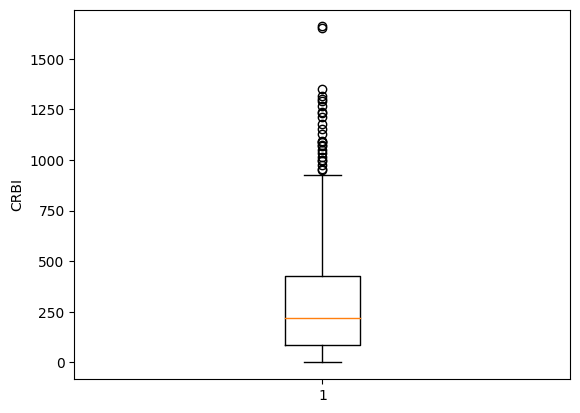

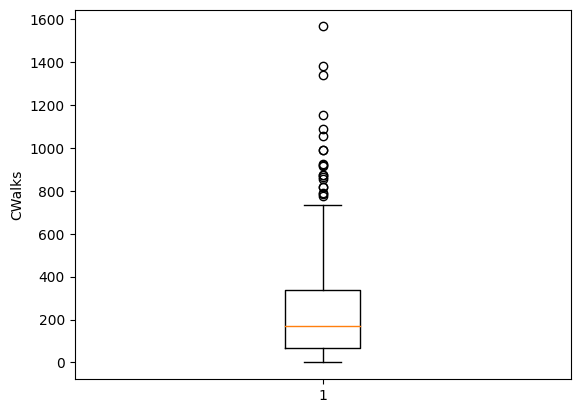

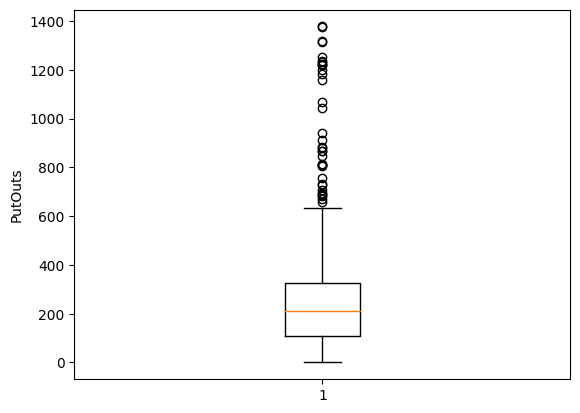

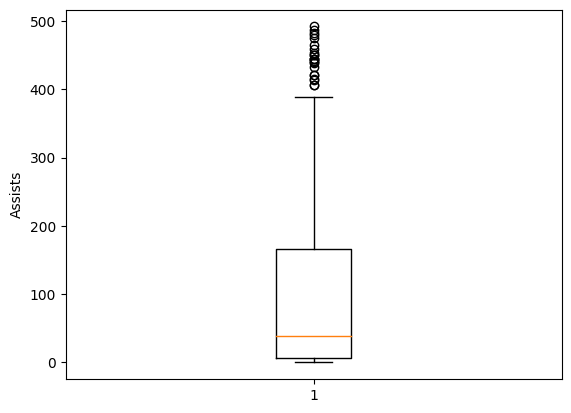

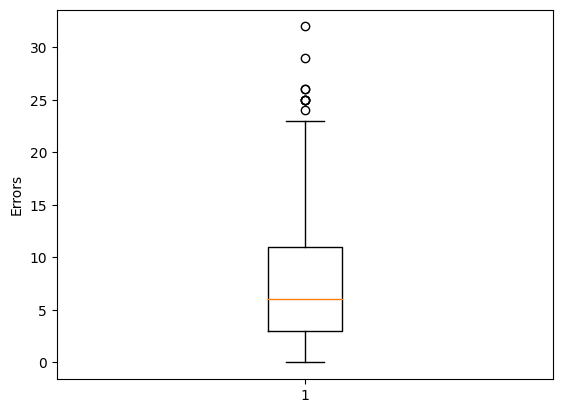

In [345]:
for column_name in df.columns:
    if column_name not in ['Salary', 'League', 'Division', 'NewLeague']:
        plt.boxplot(df[column_name])
        plt.ylabel(column_name)
        plt.show()


##### Noise Cleaning

CHmRun, CRBI, CWalks, PutOuts, and Assists are noisy 

In [346]:
#df['Years']=pd.cut(df['Years'], 4, labels=['Beginner', 'Rookie', 'Moderate', 'Expert'])
# df['CHmRun']=pd.cut(df['CHmRun'], 10)
# df['CRBI']=pd.cut(df['CRBI'], 10)
# df['CWalks']=pd.cut(df['CWalks'], 10)
# df['PutOuts']=pd.cut(df['PutOuts'], 10)
# df['Assists']=pd.cut(df['Assists'], 10)

# df

##### Handling Outliers

HmRun, Runs, RBI, Walks, Years, CHits, CAtBat, CRuns, Errors have outliers.

In [347]:
for col in ['HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CHits', 'CAtBat', 'CRuns', 'Errors']:
    z = np.abs(stats.zscore(df[col]))
    indices=np.array(np.where(z>2.2)).flatten()
    for i in indices:
        df.at[i, col]=np.nan

df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1,30.0,29,14,A,E,446,33,20.0,535.925882,A
1,315,81,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69,321.0,414,375,N,W,632,43,10.0,475.000000,N
2,479,130,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63,224.0,266,263,A,W,880,82,14.0,480.000000,A
3,496,141,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225,828.0,838,354,N,E,200,11,3.0,500.000000,N
4,321,87,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12,48.0,46,33,N,E,805,40,4.0,91.500000,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32,379.0,311,138,N,E,325,9,3.0,700.000000,N
318,492,136,5.0,76.0,50.0,NaN,12.0,5511.0,1511.0,39,897.0,451,875,A,E,313,381,20.0,875.000000,A
319,475,126,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7,217.0,93,146,A,W,37,113,7.0,385.000000,A
320,573,144,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97,470.0,420,332,A,E,1314,131,12.0,960.000000,A


In [348]:
print(df.isna().sum())
df=df.fillna(method='pad')

AtBat         0
Hits          0
HmRun        12
Runs          3
RBI           9
Walks        10
Years         5
CAtBat       10
CHits        10
CHmRun        0
CRuns        10
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors       11
Salary        0
NewLeague     0
dtype: int64


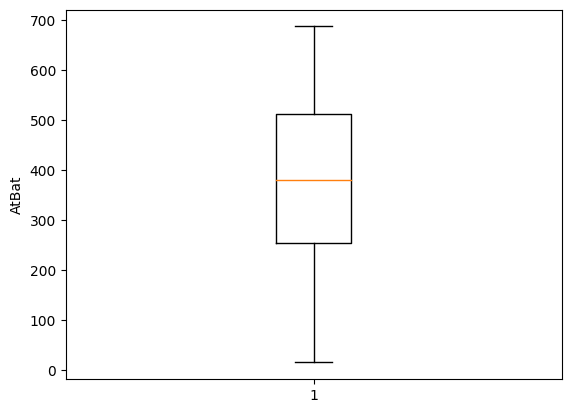

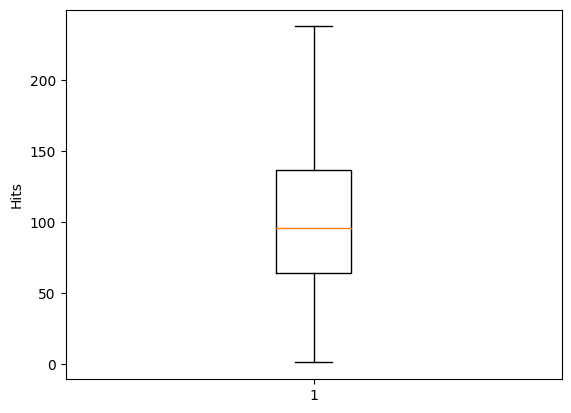

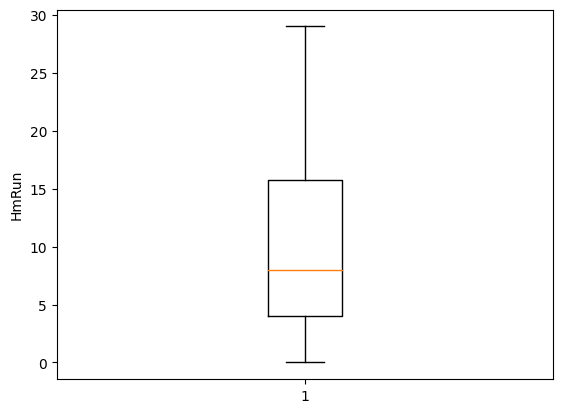

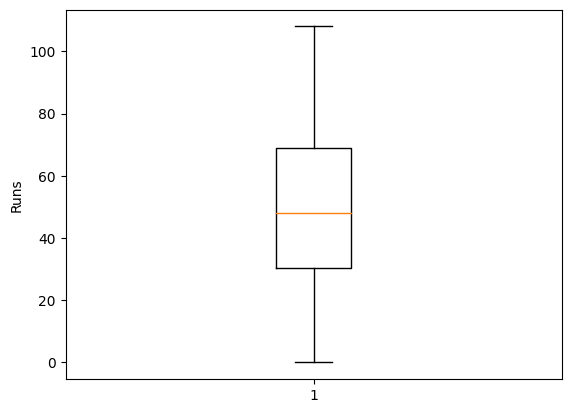

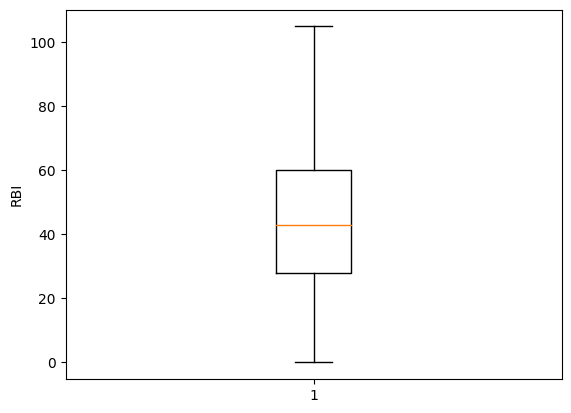

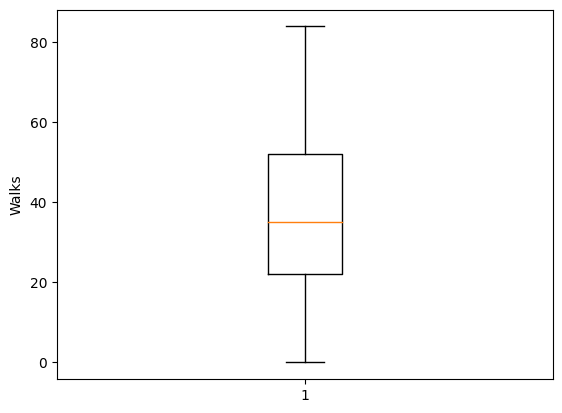

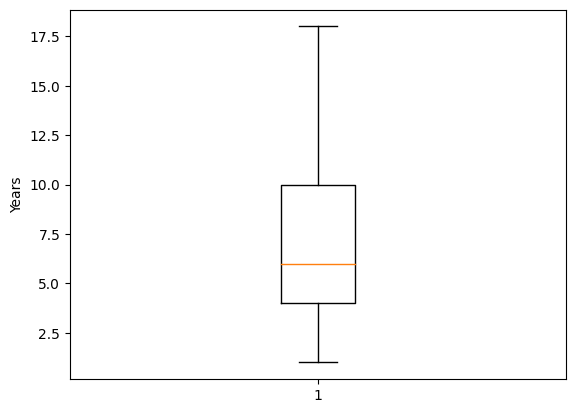

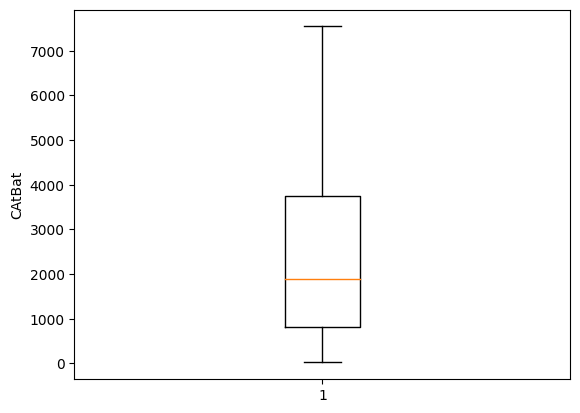

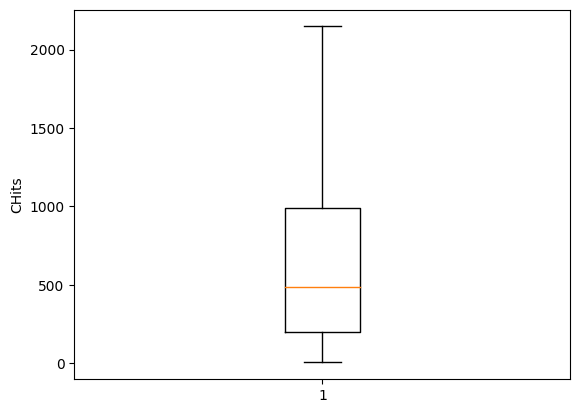

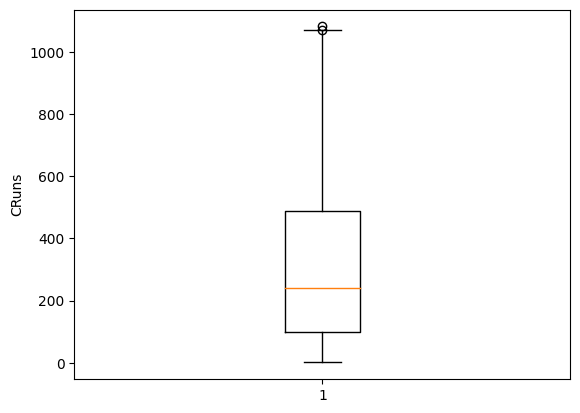

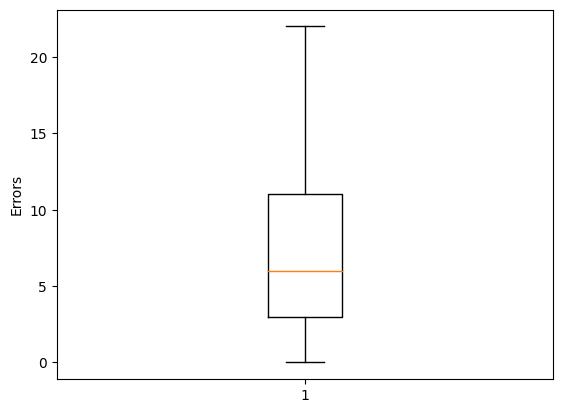

In [349]:
for column_name in df.columns:
    if column_name not in ['Salary', 'League', 'Division', 'NewLeague', 'CHmRun', 'CRBI', 'CWalks', 'PutOuts', 'Assists']:
        plt.boxplot(df[column_name])
        plt.ylabel(column_name)
        plt.show()


### Categorical to Numerical Encoding

In [350]:
# df['CHmRun']=pd.factorize(df['CHmRun'])[0]
# df['CRBI']=pd.factorize(df['CRBI'])[0]
# df['CWalks']=pd.factorize(df['CWalks'])[0]
# df['PutOuts']=pd.factorize(df['PutOuts'])[0]
# df['Assists']=pd.factorize(df['Assists'])[0]
df['League']=pd.factorize(df['League'])[0]
df['Division']=pd.factorize(df['Division'])[0]
df['NewLeague']=pd.factorize(df['NewLeague'])[0]
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1,30.0,29,14,0,0,446,33,20.0,535.925882,0
1,315,81,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69,321.0,414,375,1,1,632,43,10.0,475.000000,1
2,479,130,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63,224.0,266,263,0,1,880,82,14.0,480.000000,0
3,496,141,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225,828.0,838,354,1,0,200,11,3.0,500.000000,1
4,321,87,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12,48.0,46,33,1,0,805,40,4.0,91.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32,379.0,311,138,1,0,325,9,3.0,700.000000,1
318,492,136,5.0,76.0,50.0,37.0,12.0,5511.0,1511.0,39,897.0,451,875,0,0,313,381,20.0,875.000000,0
319,475,126,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7,217.0,93,146,0,1,37,113,7.0,385.000000,0
320,573,144,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97,470.0,420,332,0,0,1314,131,12.0,960.000000,0


## (b) Separate X & Y and Perform Scaling

In [352]:
X=df.iloc[:, 0:18]
X=X.join(df.iloc[:, 19])
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
0,293,66,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1,30.0,29,14,0,0,446,33,20.0,0
1,315,81,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69,321.0,414,375,1,1,632,43,10.0,1
2,479,130,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63,224.0,266,263,0,1,880,82,14.0,0
3,496,141,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225,828.0,838,354,1,0,200,11,3.0,1
4,321,87,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12,48.0,46,33,1,0,805,40,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32,379.0,311,138,1,0,325,9,3.0,1
318,492,136,5.0,76.0,50.0,37.0,12.0,5511.0,1511.0,39,897.0,451,875,0,0,313,381,20.0,0
319,475,126,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7,217.0,93,146,0,1,37,113,7.0,0
320,573,144,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97,470.0,420,332,0,0,1314,131,12.0,0


In [353]:
Y=df.iloc[:, 18]
Y

0       535.925882
1       475.000000
2       480.000000
3       500.000000
4        91.500000
          ...     
317     700.000000
318     875.000000
319     385.000000
320     960.000000
321    1000.000000
Name: Salary, Length: 322, dtype: float64

In [354]:
scaler=StandardScaler()
X['AtBat']=scaler.fit_transform(X['AtBat'].values.reshape(-1, 1)).flatten()
X['Hits']=scaler.fit_transform(X['Hits'].values.reshape(-1, 1)).flatten()
X['CAtBat']=scaler.fit_transform(X['CAtBat'].values.reshape(-1, 1)).flatten()
X['CHits']=scaler.fit_transform(X['CHits'].values.reshape(-1, 1)).flatten()
X['CRuns']=scaler.fit_transform(X['CRuns'].values.reshape(-1, 1)).flatten()
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
0,-0.574071,-0.755130,1.0,30.0,29.0,14.0,1.0,-1.075989,-1.057239,1,-1.034826,29,14,0,0,446,33,20.0,0
1,-0.430437,-0.431732,7.0,24.0,38.0,39.0,14.0,0.489582,0.310346,69,-0.032031,414,375,1,1,632,43,10.0,1
2,0.640293,0.624699,18.0,66.0,72.0,76.0,3.0,-0.415731,-0.361887,63,-0.366296,266,263,0,1,880,82,14.0,0
3,0.751283,0.861858,20.0,65.0,78.0,37.0,11.0,1.570500,1.626358,225,1.715107,838,354,1,0,200,11,3.0,1
4,-0.391264,-0.302373,10.0,39.0,42.0,30.0,2.0,-1.024894,-0.994995,12,-0.972798,46,33,1,0,805,40,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.757812,0.560020,7.0,65.0,48.0,37.0,5.0,0.119520,0.258773,32,0.167839,311,138,1,0,325,9,3.0,1
318,0.725167,0.754058,5.0,76.0,50.0,37.0,12.0,1.512461,1.512541,39,1.952883,451,875,0,0,313,381,20.0,0
319,0.614177,0.538460,3.0,61.0,43.0,52.0,6.0,-0.378030,-0.404568,7,-0.390418,93,146,0,1,37,113,7.0,0
320,1.254003,0.926537,9.0,85.0,60.0,78.0,8.0,0.365071,0.349471,97,0.481428,420,332,0,0,1314,131,12.0,0


## (c) Model Training

In [355]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

model_ridge=Ridge(alpha=0.5748)
model_lasso=Lasso(alpha=0.5748)

model_ridge.fit(X_train, Y_train)
model_lasso.fit(X_train, Y_train)


Lasso(alpha=0.5748)

In [356]:
print(f"Ridge score={model_ridge.score(X_train, Y_train)}")
print(f"Lasso score={model_lasso.score(X_train, Y_train)}")

Ridge score=0.48668701830741967
Lasso score=0.4861059273221653


### Ridge performs slightly better

# Question 3

In [357]:
#load_boston is deprecated
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler

In [358]:
housing=fetch_california_housing()
df=pd.DataFrame(housing.data, columns=housing.feature_names)
df['Price']=housing.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Data Preprocessing

### Missing Values

In [359]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

### Noisy Values

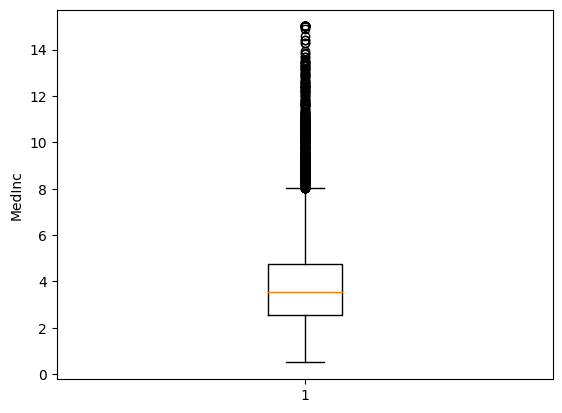

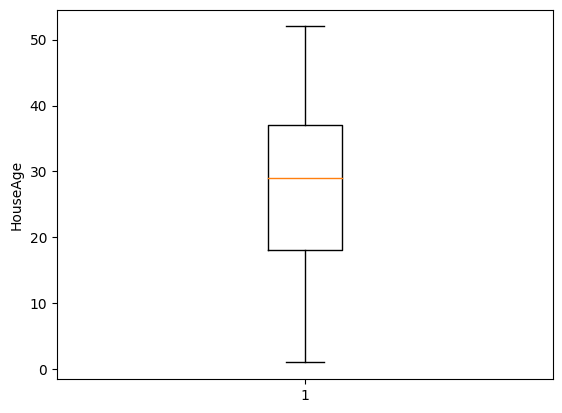

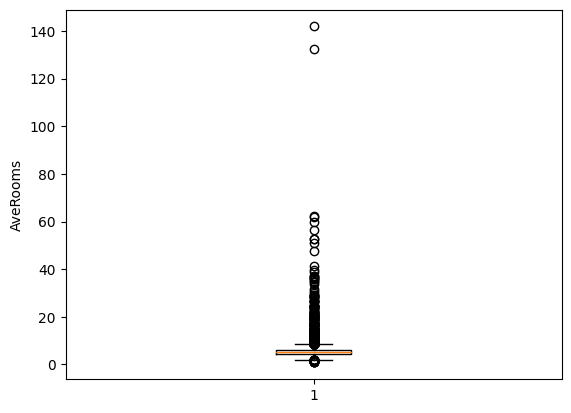

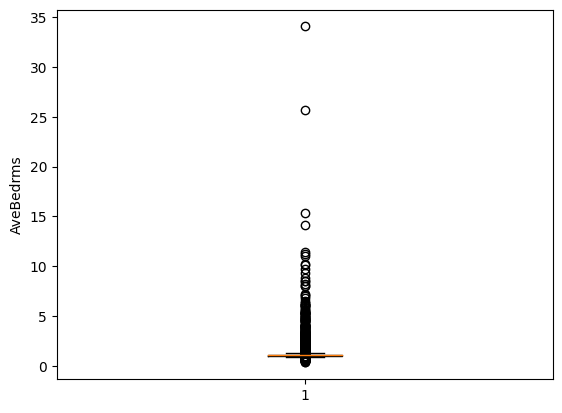

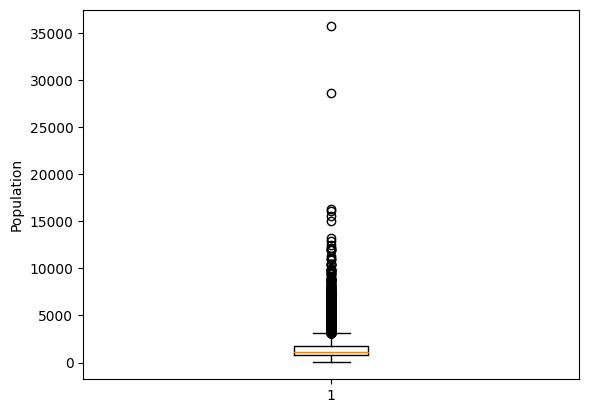

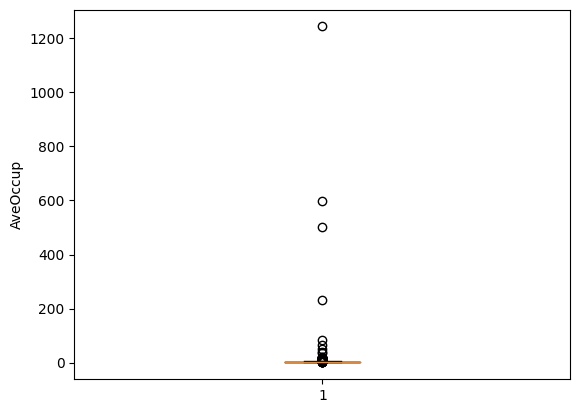

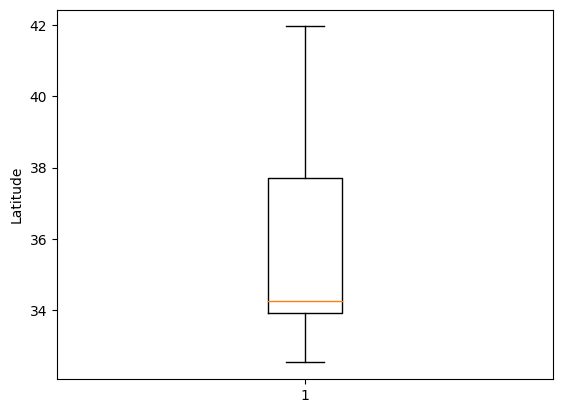

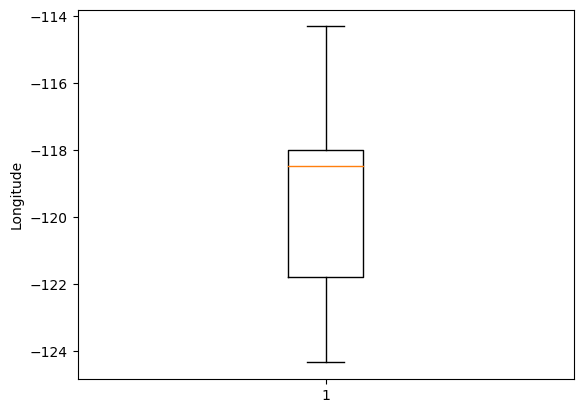

In [360]:
for column_name in df.columns:
    if column_name not in ['Price']:
        plt.boxplot(df[column_name])
        plt.ylabel(column_name)
        plt.show()


In [361]:
# df['MedInc']=pd.cut(df['MedInc'], 4)
# df['AveRooms']=pd.cut(df['AveRooms'], 4)
# df['AveBedrms']=pd.cut(df['AveBedrms'], 4)
# df['Population']=pd.cut(df['Population'], 4)
# df['AveOccup']=pd.cut(df['AveOccup'], 4)

# df

### Categorical to Numerical Encoding

In [362]:
# df['MedInc']=pd.factorize(df['MedInc'])[0]
# df['AveRooms']=pd.factorize(df['AveRooms'])[0]
# df['AveBedrms']=pd.factorize(df['AveBedrms'])[0]
# df['Population']=pd.factorize(df['Population'])[0]
# df['AveOccup']=pd.factorize(df['AveOccup'])[0]
# df

## Separate X & Y

In [363]:
X=df.iloc[:, 0:8]
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [364]:
Y=df.iloc[:, 8]
Y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

## Model Training

In [365]:
model_ridgecv=RidgeCV(alphas=[1e-5, 1e-3, 1e-1, 1, 1e1, 1e3, 1e5])
model_ridgecv.fit(X, Y)
print(f"Score={model_ridgecv.score(X, Y)}")
print(f"Best lambda={model_ridgecv.alpha_}")

Score=0.6062301017654412
Best lambda=10.0


In [366]:
model_lassocv=LassoCV(alphas=[1e-5, 1e-3, 1e-1, 1, 1e1, 1e3, 1e5])
model_lassocv.fit(X, Y)
print(f"Score={model_lassocv.score(X, Y)}")
print(f"Best lambda={model_lassocv.alpha_}")

Score=0.6061945447229312
Best lambda=0.001
